In [626]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [627]:
#Loading the data
data0 = pd.read_csv('urldata20k.csv')
data0.head()

Domain  Have_IP  Have_At  URL_Length  URL_Depth  Redirection  \
0  correios.com.br        0        0           1          4            0   
1     caixa.gov.br        0        0           1          6            0   
2           olx.ua        0        0           1          4            0   
3         emgn.com        0        0           1          2            0   
4      metro.co.uk        0        0           1          4            0   

   https_Domain  TinyURL  Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  \
0             0        0              0           0            0           1   
1             0        0              0           0            0           1   
2             0        0              0           0            0           1   
3             0        0              0           0            1           1   
4             0        0              0           0            0           0   

   Domain_End  iFrame  Mouse_Over  Right_Click  Web_Forwards  Label  
0           1       0           0            1             0      0  
1           1       0           0            1             0      0  
2           1       0           0            1             1      0  
3           1       1           1            1             1      0  
4           1       0           0            1             0      0

In [628]:
data0.shape

(20279, 18)

In [629]:
data0.columns

Index(['Domain', 'Have_IP', 'Have_At', 'URL_Length', 'URL_Depth',
       'Redirection', 'https_Domain', 'TinyURL', 'Prefix/Suffix', 'DNS_Record',
       'Web_Traffic', 'Domain_Age', 'Domain_End', 'iFrame', 'Mouse_Over',
       'Right_Click', 'Web_Forwards', 'Label'],
      dtype='object')

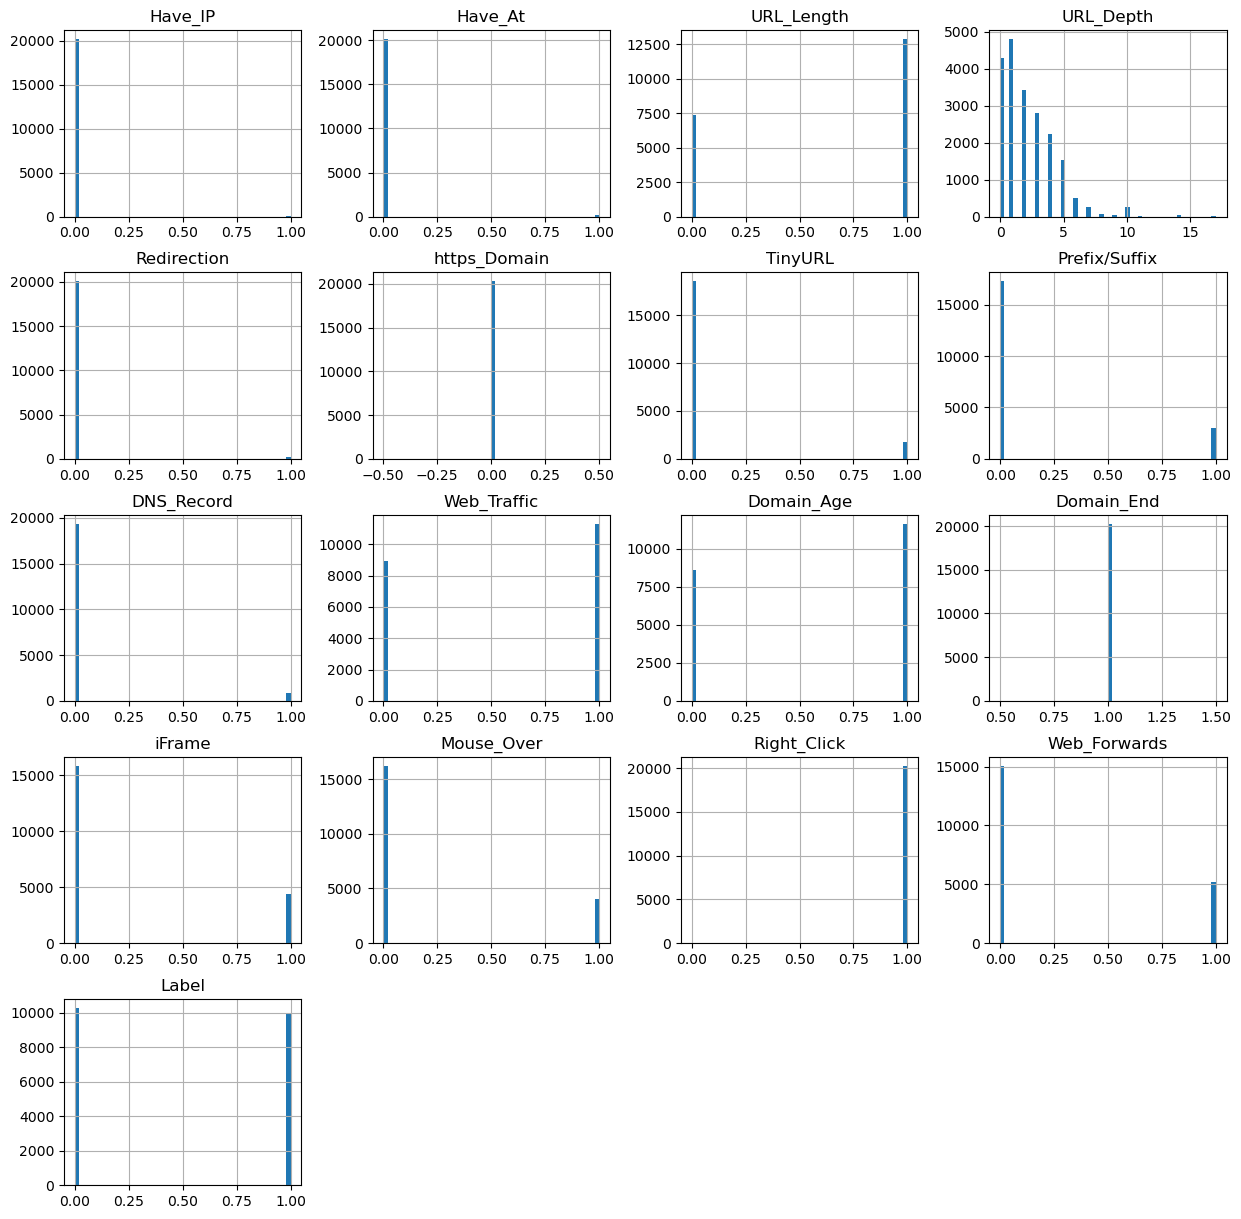

In [630]:
data0.hist(bins = 50,figsize = (15,15))
plt.show()

In [631]:
# print(data0.dtypes)
# Select only numeric columns for correlation
data0_numeric = data0.select_dtypes(include=[np.number])
# If you want to check for any remaining non-numeric columns
if data0_numeric.shape[1] == 0:
    print("No numeric columns available for correlation.")

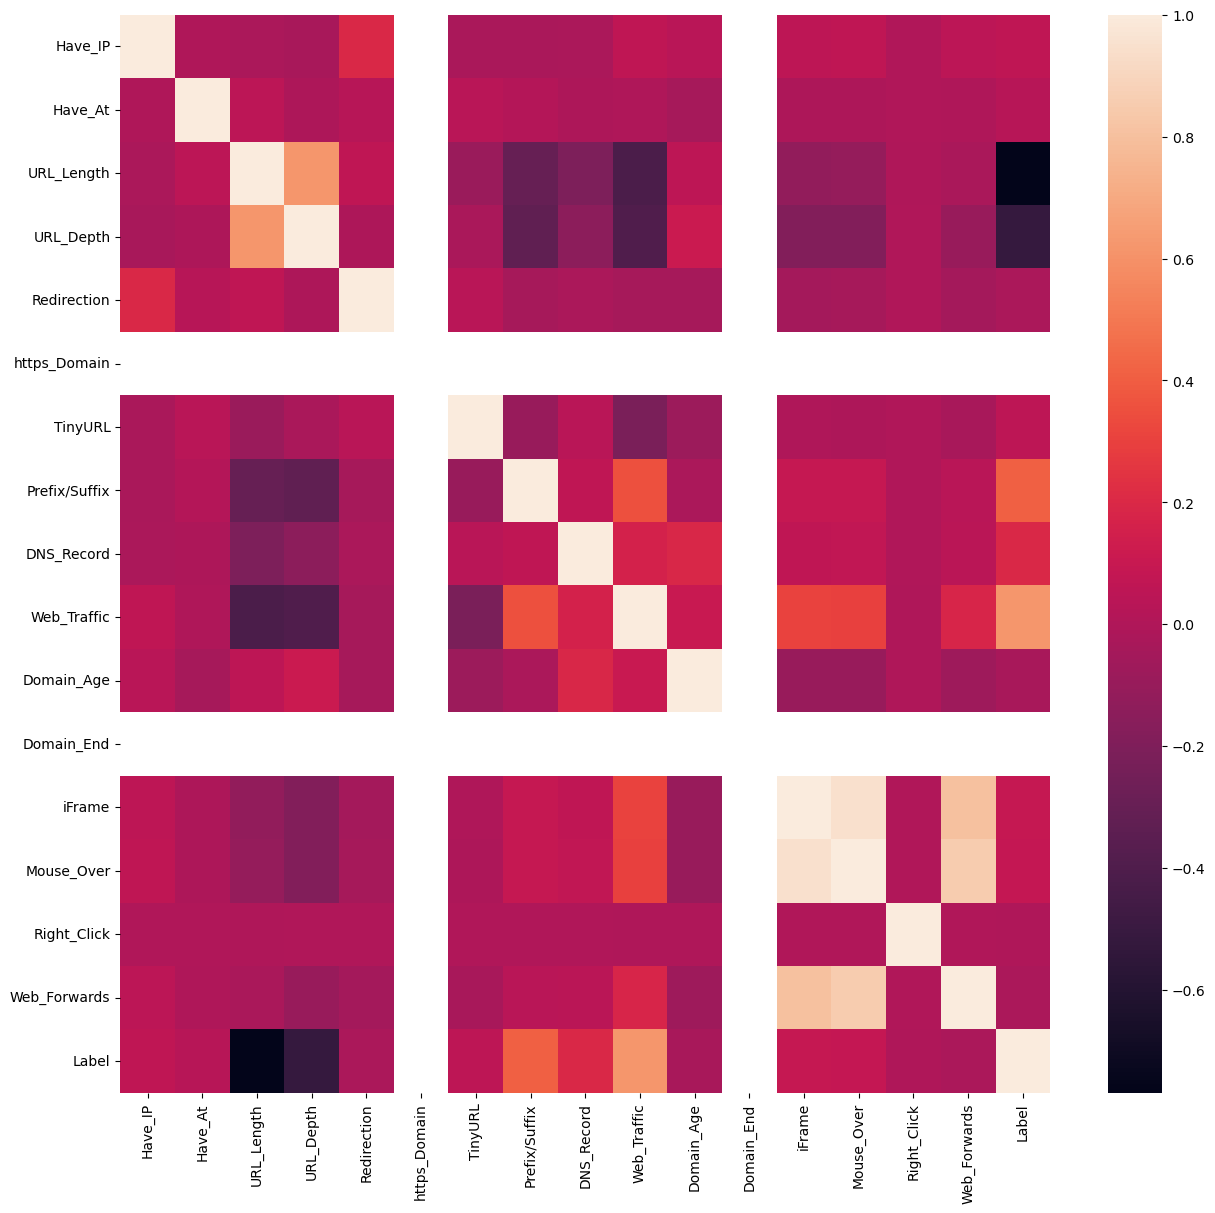

In [632]:
plt.figure(figsize=(15,14))
sns.heatmap(data0_numeric.corr())
plt.show()

In [633]:
data0.describe()

Have_IP       Have_At    URL_Length     URL_Depth   Redirection  \
count  20279.000000  20279.000000  20279.000000  20279.000000  20279.000000   
mean       0.005819      0.006756      0.634943      2.253119      0.010849   
std        0.076061      0.081917      0.481458      2.088057      0.103593   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      1.000000      0.000000   
50%        0.000000      0.000000      1.000000      2.000000      0.000000   
75%        0.000000      0.000000      1.000000      3.000000      0.000000   
max        1.000000      1.000000      1.000000     17.000000      1.000000   

       https_Domain       TinyURL  Prefix/Suffix    DNS_Record   Web_Traffic  \
count       20279.0  20279.000000   20279.000000  20279.000000  20279.000000   
mean            0.0      0.085359       0.147197      0.044233      0.558361   
std             0.0      0.279422       0.354311      0.205617      0.496595   
min             0.0      0.000000       0.000000      0.000000      0.000000   
25%             0.0      0.000000       0.000000      0.000000      0.000000   
50%             0.0      0.000000       0.000000      0.000000      1.000000   
75%             0.0      0.000000       0.000000      0.000000      1.000000   
max             0.0      1.000000       1.000000      1.000000      1.000000   

         Domain_Age  Domain_End        iFrame    Mouse_Over   Right_Click  \
count  20279.000000     20279.0  20279.000000  20279.000000  20279.000000   
mean       0.575127         1.0      0.217269      0.200158      0.999951   
std        0.494336         0.0      0.412397      0.400128      0.007022   
min        0.000000         1.0      0.000000      0.000000      0.000000   
25%        0.000000         1.0      0.000000      0.000000      1.000000   
50%        1.000000         1.0      0.000000      0.000000      1.000000   
75%        1.000000         1.0      0.000000      0.000000      1.000000   
max        1.000000         1.0      1.000000      1.000000      1.000000   

       Web_Forwards         Label  
count  20279.000000  20279.000000  
mean       0.256127      0.493121  
std        0.436504      0.499965  
min        0.000000      0.000000  
25%        0.000000      0.000000  
50%        0.000000      0.000000  
75%        1.000000      1.000000  
max        1.000000      1.000000

In [634]:
data = data0.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()

In [635]:
data = data.sample(frac=1).reset_index(drop=True)
data.head()

Have_IP  Have_At  URL_Length  URL_Depth  Redirection  TinyURL  \
0        0        0           1          4            0        0   
1        0        0           1          3            0        0   
2        0        0           1         10            0        0   
3        0        0           1          3            0        0   
4        0        0           1          1            0        0   

   Prefix/Suffix  DNS_Record  Web_Traffic  Domain_Age  Domain_End  iFrame  \
0              0           0            1           0           1       0   
1              0           0            0           0           1       0   
2              0           0            0           0           1       0   
3              0           0            0           0           1       0   
4              0           0            0           0           1       0   

   Mouse_Over  Web_Forwards  Label  
0           0             0      1  
1           0             0      0  
2           0             0      0  
3           0             0      0  
4           0             0      0

In [636]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((20279, 14), (20279,))

In [637]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 42)
X_train.shape, X_test.shape

((16223, 14), (4056, 14))

In [638]:
# from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score


In [640]:
#Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

In [646]:
#XGBoost Classification model
from xgboost import XGBClassifier

#instantiate the model
xgb = XGBClassifier(learning_rate=0.2,max_depth=12)
# xgb = XGBClassifier(eval_metric='auc', colsample_bytree= 0.8, gamma = 0.1, learning_rate= 0.2, max_depth= 7, n_estimators= 200, subsample= 0.6)

#fit the model
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=12, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [647]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)

In [649]:
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.969
XGBoost : Accuracy on test Data: 0.968


In [650]:
scores = cross_val_score(xgb, X_train, y_train, cv=5)
print(f"Mean Accuracy: {scores.mean():.2f}")

Mean Accuracy: 0.97


In [651]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

In [652]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

ML Model  Train Accuracy  Test Accuracy
0  XGBoost           0.969          0.968


Accuracy on Test Data: 0.9635

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96      2056
           1       0.97      0.95      0.96      2000

    accuracy                           0.96      4056
   macro avg       0.96      0.96      0.96      4056
weighted avg       0.96      0.96      0.96      4056



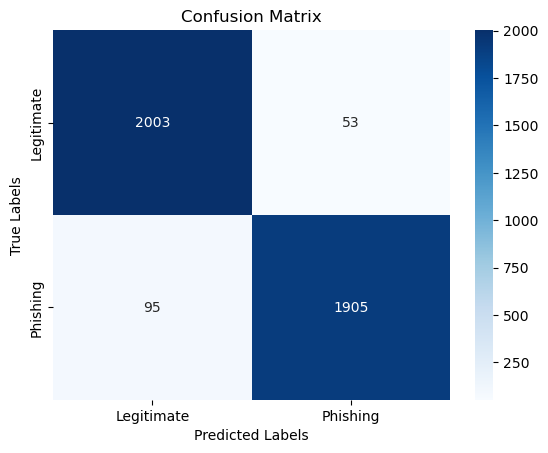

In [674]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

data1 = pd.read_csv('urldata20k.csv')
#data1.head()
data1 = data1.drop(['Domain'], axis = 1).copy()
data1 = data1.sample(frac=1).reset_index(drop=True)
y = data1['Label']
X = data1.drop('Label',axis=1)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train the XGBoost model
#xgb_model = XGBClassifier(eval_metric='logloss', random_state=42)
# Hyperparameters
params = {
    'colsample_bytree': 0.7862468704907701,
    'gamma': 0.8613550234720824,
    'learning_rate': 0.23003868086194057,
    'max_depth': 6,
    'n_estimators': 6,
    'reg_alpha': 0.08885184806583746,
    'reg_lambda': 0.4671485658354062,
    'subsample': 0.5337114618970547
}

# Create XGBoost classifier with the specified hyperparameters
xgb_model = XGBClassifier(**params, eval_metric='logloss', random_state=42)

xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy on Test Data: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Legitimate', 'Phishing'], yticklabels=['Legitimate', 'Phishing'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [673]:
#Updated Script with Grid Search Hyperparameter Optimization python
from sklearn.model_selection import GridSearchCV, train_test_split
#from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, matthews_corrcoef

data2 = pd.read_csv('urldata20k.csv')
data2.head()
data2 = data2.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()
data2 = data2.sample(frac=1).reset_index(drop=True)
y = data2['Label']
X = data2.drop('Label',axis=1)

# Selected features
selected_features = ['DNS_Record', 'URL_Length', 'Mouse_Over', 'Web_Traffic', 'Domain_Age', 
                     'URL_Depth', 'Prefix/Suffix', 'iFrame', 'Domain_End', 'Web_Forwards', 
                     'TinyURL', 'Have_IP']

# Assuming 'data' contains your dataset with features and target variable
# Replace 'target' with the actual name of your target column
#X = data[selected_features]
#y = data['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Define the XGBoost model
xgb_model = XGBClassifier(eval_metric='logloss')

# Define parameter grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'gamma': [0, 0.1, 0.3]
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, 
                           scoring='accuracy', cv=5, verbose=2)

grid_search.fit(X_train, y_train)

# Get the best model from Grid Search
best_model = grid_search.best_estimator_

# Predict on test and train data
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

# Evaluate the model
print("\nBest Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nAccuracy on Train Data:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


# Confusion Matrix and metrics
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

TPR = TP / (TP + FN)  # True Positive Rate (Recall)
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Display additional metrics
print(f"\nTrue Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")


Fitting 5 folds for each of 729 candidates, totalling 3645 fits
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.6; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.6, gamma=0, learning_rate=0.01, max_dept

In [676]:
from hyperopt import fmin, tpe, hp, Trials, STATUS_OK

data4 = pd.read_csv('urldata20k.csv')
data4 = data4.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()
data4 = data4.sample(frac=1).reset_index(drop=True)
y = data4['Label']
X = data4.drop('Label',axis=1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Define the hyperparameter space
space = {
    'max_depth': hp.choice('max_depth', np.arange(3, 10, dtype=int)),
    'learning_rate': hp.uniform('learning_rate', 0.01, 0.3),
    'n_estimators': hp.choice('n_estimators', np.arange(50, 500, step=50, dtype=int)),
    'gamma': hp.uniform('gamma', 0, 5),
    'subsample': hp.uniform('subsample', 0.5, 1.0),
    'colsample_bytree': hp.uniform('colsample_bytree', 0.5, 1.0),
    'reg_alpha': hp.uniform('reg_alpha', 0, 1),
    'reg_lambda': hp.uniform('reg_lambda', 0, 1),
}

# Objective function to minimize
def objective(params):
    model = XGBClassifier(
        max_depth=params['max_depth'],
        learning_rate=params['learning_rate'],
        n_estimators=params['n_estimators'],
        gamma=params['gamma'],
        subsample=params['subsample'],
        colsample_bytree=params['colsample_bytree'],
        reg_alpha=params['reg_alpha'],
        reg_lambda=params['reg_lambda'],
        eval_metric='logloss',
        random_state=42
    )
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return {'loss': -accuracy, 'status': STATUS_OK}

# Run the optimization
trials = Trials()
best_params = fmin(
    fn=objective,
    space=space,
    algo=tpe.suggest,
    max_evals=100,  # Number of iterations
    trials=trials,
    rstate=np.random.default_rng(42)  # For reproducibility
)

# Print the best parameters
print("\nBest Parameters:", best_params)

# Train the model with the best parameters
best_model = XGBClassifier(
    max_depth=best_params['max_depth'],
    learning_rate=best_params['learning_rate'],
    n_estimators=best_params['n_estimators'],
    gamma=best_params['gamma'],
    subsample=best_params['subsample'],
    colsample_bytree=best_params['colsample_bytree'],
    reg_alpha=best_params['reg_alpha'],
    reg_lambda=best_params['reg_lambda'],
    eval_metric='logloss',
    random_state=42
)

best_model.fit(X_train, y_train)
final_predictions = best_model.predict(X_test)
final_accuracy = accuracy_score(y_test, final_predictions)
print("\nFinal Model Accuracy:", final_accuracy)

100%|██████████| 100/100 [00:10<00:00,  9.27trial/s, best loss: -0.9677021696252466]

Best Parameters: {'colsample_bytree': 0.5728412374751249, 'gamma': 0.0008485740314165325, 'learning_rate': 0.2754366101321129, 'max_depth': 5, 'n_estimators': 6, 'reg_alpha': 0.3361621985617294, 'reg_lambda': 0.6359936909371874, 'subsample': 0.7897401949963732}

Final Model Accuracy: 0.9492110453648915


In [489]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, f1_score, matthews_corrcoef
from xgboost import XGBClassifier
import pandas as pd

data1 = pd.read_csv('urldata20k.csv')
data1.head()
data = data1.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()
data = data.sample(frac=1).reset_index(drop=True)
y = data['Label']
X = data.drop('Label',axis=1)

# Assuming X and y are your features and target
selected_features = ['DNS_Record', 'URL_Length', 'Mouse_Over', 'Web_Traffic', 
                     'Domain_Age', 'URL_Depth', 'Prefix/Suffix', 'iFrame', 
                     'Domain_End', 'Web_Forwards', 'TinyURL', 'Have_IP']

X_selected = X[selected_features]  # Using the selected features

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=12)

# Apply SMOTE to oversample the minority class in training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Train XGBoost model
xgb_model = XGBClassifier( eval_metric='logloss')
xgb_model.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate performance
print("\nAccuracy on Test Data:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = cm.ravel()

# Metrics
TPR = TP / (TP + FN)  # True Positive Rate
TNR = TN / (TN + FP)  # True Negative Rate
FPR = FP / (FP + TN)  # False Positive Rate
FNR = FN / (FN + TP)  # False Negative Rate
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
mcc = matthews_corrcoef(y_test, y_pred)

# Display additional metrics
print(f"\nTrue Positive Rate (TPR): {TPR:.4f}")
print(f"True Negative Rate (TNR): {TNR:.4f}")
print(f"False Positive Rate (FPR): {FPR:.4f}")
print(f"False Negative Rate (FNR): {FNR:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"Matthews Correlation Coefficient (MCC): {mcc:.4f}")



Accuracy on Test Data: 0.9622781065088757

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.98      0.96      2042
           1       0.97      0.95      0.96      2014

    accuracy                           0.96      4056
   macro avg       0.96      0.96      0.96      4056
weighted avg       0.96      0.96      0.96      4056


True Positive Rate (TPR): 0.9494
True Negative Rate (TNR): 0.9750
False Positive Rate (FPR): 0.0250
False Negative Rate (FNR): 0.0506
Precision: 0.9740
F1-Score: 0.9615
Matthews Correlation Coefficient (MCC): 0.9248


Fold 1 Results:
Accuracy: 0.9938
Precision: 0.9938
Recall: 0.9938
F1-Score: 0.9938
MCC: 0.9877
----------------------------------------
Fold 2 Results:
Accuracy: 0.9979
Precision: 1.0000
Recall: 0.9959
F1-Score: 0.9979
MCC: 0.9959
----------------------------------------
Fold 3 Results:
Accuracy: 0.9949
Precision: 0.9979
Recall: 0.9918
F1-Score: 0.9949
MCC: 0.9898
----------------------------------------
Fold 4 Results:
Accuracy: 0.9973
Precision: 1.0000
Recall: 0.9945
F1-Score: 0.9973
MCC: 0.9945
----------------------------------------
Fold 5 Results:
Accuracy: 0.9976
Precision: 0.9993
Recall: 0.9959
F1-Score: 0.9976
MCC: 0.9952
----------------------------------------

Average Accuracy Across Folds: 0.9963

Metrics Summary Across Folds:
   Fold  Accuracy  Precision    Recall  F1-Score       MCC
0     1  0.993840   0.993840  0.993840  0.993840  0.987680
1     2  0.997947   1.000000  0.995893  0.997942  0.995902
2     3  0.994867   0.997934  0.991786  0.994851  0.989752
3     4  0.997

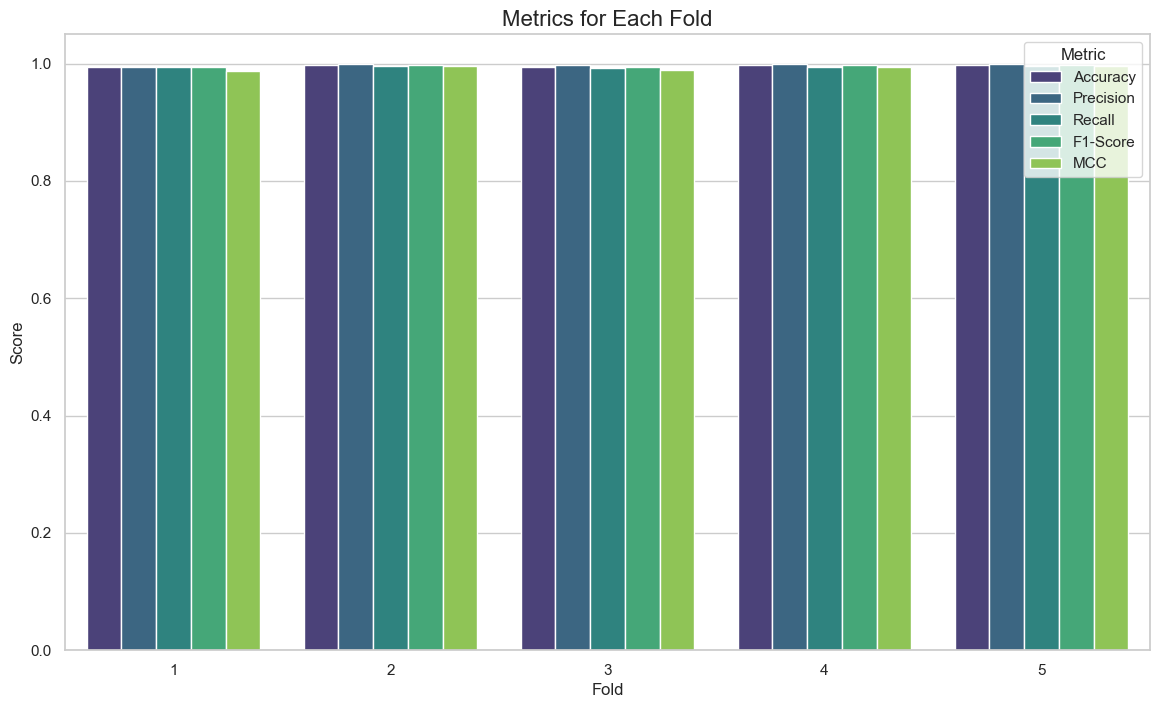

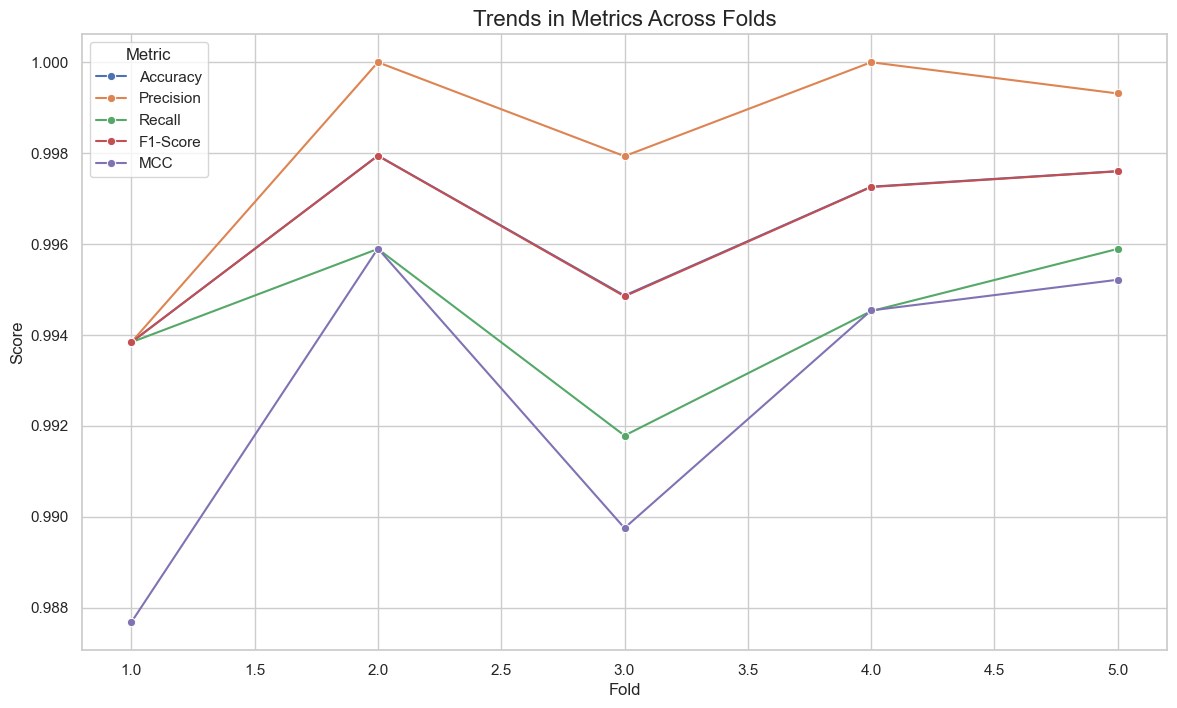

In [692]:
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, matthews_corrcoef
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

data1 = pd.read_csv('urldata13k.csv')
data1.head()
data = data1.drop(['Domain','https_Domain','Right_Click'], axis = 1).copy()
data = data.sample(frac=1).reset_index(drop=True)

y = data['Label']
X = data.drop('Label',axis=1)
# Apply SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Initialize the XGBoost model
xgb_model = XGBClassifier( eval_metric='logloss')

# Stratified K-Fold Cross-Validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold_accuracies = []
fold_metrics = []

for fold, (train_index, test_index) in enumerate(skf.split(X_resampled, y_resampled), 1):
    X_train, X_test = X_resampled.iloc[train_index], X_resampled.iloc[test_index]
    y_train, y_test = y_resampled.iloc[train_index], y_resampled.iloc[test_index]

    # Fit the model
    xgb_model.fit(X_train, y_train)

    # Predict
    y_pred = xgb_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Store results
    fold_accuracies.append(accuracy)
    fold_metrics.append({
        'Fold': fold,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1-Score': f1,
        'MCC': mcc
    })

    # Print results for each fold
    print(f"Fold {fold} Results:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"MCC: {mcc:.4f}")
    print("-" * 40)

# Average Metrics Across Folds
avg_accuracy = sum(fold_accuracies) / len(fold_accuracies)
print(f"\nAverage Accuracy Across Folds: {avg_accuracy:.4f}")

# Detailed Metrics for All Folds
import pandas as pd
metrics_df = pd.DataFrame(fold_metrics)
print("\nMetrics Summary Across Folds:")
print(metrics_df)

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Convert fold_metrics to DataFrame if not already
metrics_df = pd.DataFrame(fold_metrics)

# Set style
sns.set(style="whitegrid")

# Bar Plot: Metrics for each fold
plt.figure(figsize=(14, 8))
metrics_melted = metrics_df.melt(id_vars="Fold", var_name="Metric", value_name="Score")
sns.barplot(data=metrics_melted, x="Fold", y="Score", hue="Metric", palette="viridis")
plt.title("Metrics for Each Fold", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Metric")
plt.savefig('graphics/Metrics-for-each-fold.jpg')
plt.show()

# Line Plot: Trends across folds
plt.figure(figsize=(14, 8))
sns.lineplot(data=metrics_melted, x="Fold", y="Score", hue="Metric", marker="o", palette="deep")
plt.title("Trends in Metrics Across Folds", fontsize=16)
plt.xlabel("Fold", fontsize=12)
plt.ylabel("Score", fontsize=12)
plt.legend(title="Metric")
plt.savefig('graphics/Trends-across-folds.jpg')
plt.show()
